## K An implementation of a Shallow Neural Network in Keras – Moons dataset

Link: http://datahacker.rs/implementing-shallow-neural-network-keras-moon-shaped-dataset/

Here we will learn how to make classification of Moons dataset with a shallow neural network implemented in Keras. With the following code we are going to import all libraries that we will need.

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from mpl_toolkits import mplot3d
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
plt.style.use('ggplot')

First, we will generate a random dataset, then we will split it into train and test set. We will also print dimensions of these datasets.



## 1. Create an artificial dataset

In [140]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# generate two datasets and print their shape
X,y = make_moons(n_samples = 6000, noise = 0.08)
print('X:\t{}' .format(X.shape))
print('y:\t{}' .format(y.shape))
print(type(X))
print(type(y))

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# shape of training and test set
print('X_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('X_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

X:	(6000, 2)
y:	(6000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train:	(4020, 2)
y_train:	(4020,)
X_test:		(1980, 2)
y_test:		(1980,)


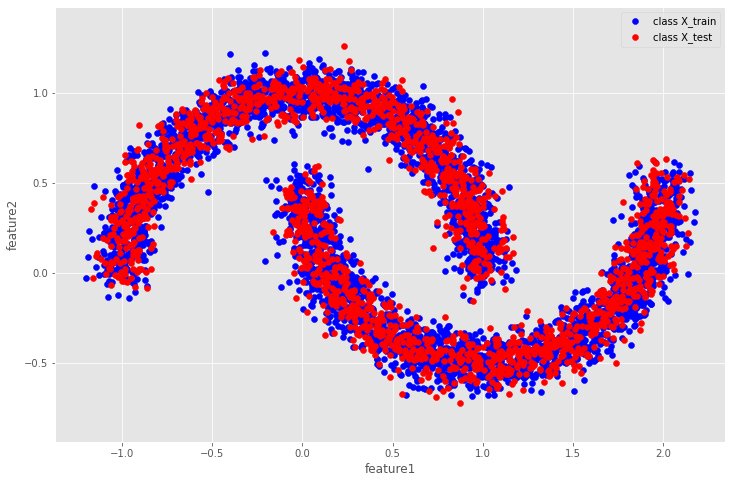

In [141]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0],X_train[:,1], color = 'b', label = 'class X_train')
plt.scatter(X_test[:,0],X_test[:,1], color = 'r', label = 'class X_test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

With the following code we will make a shallow neural network. Our shallow neural network will have two hidden layers, the first layers with 6 hidden units and the second layer with just 1 units hidden.

## 2. Implementing a Neural Network

In [142]:
# Hyper-parameters
training_epochs = 100

learning_rate = 0.03

In [143]:
# create model
def create_model():
  model = Sequential()
  # Input layer
  model.add(Dense(4, input_dim=2, kernel_initializer='normal', activation='tanh'))
  # Hidden layer
  model.add(Dense(6, activation='relu'))
  # Output layer
  model.add(Dense(1, activation='sigmoid'))
 
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
  return model

In [144]:
# make a shallow neural network
model = create_model()
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_34 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 7         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [147]:
# training 
results = model.fit(
 X_train, y_train.T,
 epochs= training_epochs,
 batch_size = 5,
 validation_data = (X_test, y_test.T)
)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.0711 - accuracy: 0.9938 - val_loss: 8.4709e-04 - val_accuracy: 0.9995
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 7.9851e-05 - accuracy: 1.0000 - val_loss: 3.5346e-04 - val_accuracy: 1.0000
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 5.2066e-05 - accuracy: 1.0000 - val_loss: 1.7347e-04 - val_accuracy: 1.0000
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 1.1166e-04 - accuracy: 1.0000 - val_loss: 2.3073e-05 - val_accuracy: 1.0000
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 1.1472e-05 - accuracy: 1.0000 - val_loss: 2.1313e-05 - val_accuracy: 1.0000
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 1.0698e-05 - accuracy: 1.0000 - val_loss: 1.6573e-05 - val_accuracy: 1.0000
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 8.9137e-06 - accuracy: 

Here we will print some results we go.

In [148]:
print('Mean value of accuracy during training time is: %.2f' %np.mean(results.history["val_accuracy"]))

Mean value of accuracy during training time is: 1.00


In [149]:
prediction_values = model.predict(X_test)
prediction_values.shape

(1980, 1)

In [150]:
print(model.metrics_names[:])

['loss', 'accuracy']


In [151]:
# evaluate the model
scores = model.evaluate(X_train, y_train.T)
print("\n%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

126/126 [==============================] - 0s 1ms/step - loss: 1.4004e-06 - accuracy: 1.0000

accuracy: 100.00%


In [152]:
scores

[1.4003625210534665e-06, 1.0]

Let’s see how loss and accuracy of prediction change over epochs.

Maximum Loss: 0.1617 
Minimum Loss: 0.0000 
Loss difference: 0.1617


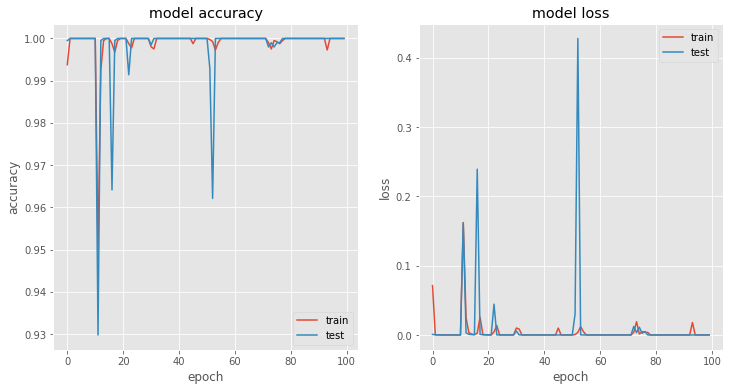

In [153]:
plt.figure(figsize=(12,6))
# summarize history for accuracy
plt.subplot(121)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='lower right')

# summarize history for loss
plt.subplot(122)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss: {:.4f} ".format(max_loss))
print("Minimum Loss: {:.4f} ".format(min_loss))
print("Loss difference: {:.4f}".format(max_loss - min_loss))

## 3. Visualization

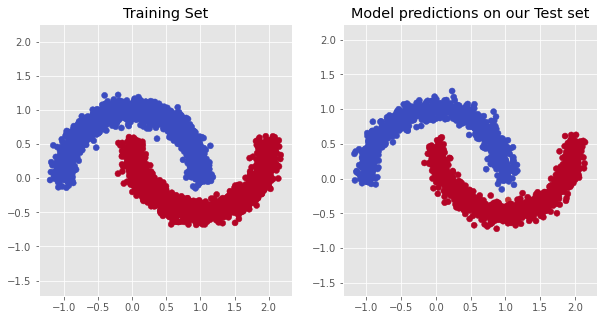

In [161]:
plt.figure (figsize=(10,5))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm.coolwarm)
plt.title('Training Set')
plt.axis('equal');

plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')
plt.axis('equal');

Text(0.5, 1.0, 'Model prediction on our Test set')

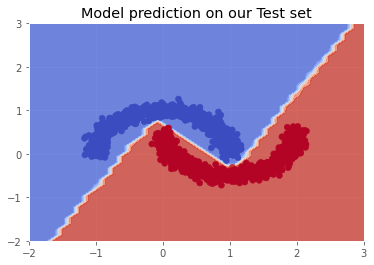

In [163]:
xx = np.linspace(-2, 3, 40)
yy = np.linspace(-2, 3, 40)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-2, 3])
axes.set_ylim([-2, 3])

plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model prediction on our Test set')

Now, we will print values of weights and biases that we got after training process.

In [164]:
# Input layer
weights0 = model.layers[0].get_weights()[0]
biases0 = model.layers[0].get_weights()[1]
print("Input layer weights",weights0.shape,":\n",weights0)
print("Input layer biases",biases0.shape,":\n",biases0)

# Hidden layer
weights1 = model.layers[1].get_weights()[0]
biases1 = model.layers[1].get_weights()[1]
print("\nHidden layer weights",weights1.shape,":\n",weights1)
print("Hidden layer biases",biases1.shape,":\n",biases1)

# Output layer
weights2 = model.layers[2].get_weights()[0]
biases2 = model.layers[2].get_weights()[1]
print("\nOutput layer weights",weights2.shape,":\n",weights2)
print("Output layer biases",biases2.shape,":\n",biases2)


Input layer weights (2, 4) :
 [[ 5.448345   -4.315009    6.91981     6.389321  ]
 [-0.74284416  2.2867508  -3.8923886   5.852448  ]]
Input layer biases (4,) :
 [ 7.0404887  5.648113   3.7058382 -3.8216927]

Hidden layer weights (4, 6) :
 [[ -6.4947343   -3.3406556    3.3902342   -6.5976076   -0.09833536
    5.28853   ]
 [  0.1567776   -0.03386023  -0.69809765  -0.37011087  -0.43740943
   -6.090122  ]
 [  2.4000568   -1.1359713  -10.797056    -0.98854154   0.25850406
    5.999675  ]
 [ -1.1307899   -1.3709015   -1.3992192    1.3450135    0.7280795
   -8.813627  ]]
Hidden layer biases (6,) :
 [-1.486114  -1.4843658  1.1171579 -2.7704597 -1.6998105  2.277197 ]

Output layer weights (6, 1) :
 [[ 3.1794083 ]
 [-0.15735216]
 [-2.933203  ]
 [ 2.9942589 ]
 [-0.13161801]
 [ 3.9700253 ]]
Output layer biases (1,) :
 [-13.336122]


Let’s now see what are the calculations behind every node of our neural network.

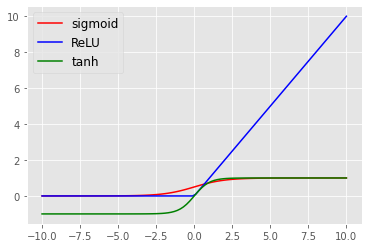

In [165]:
def sigmoid(z):
  return 1./(1+np.exp(-z))

def ReLU(z):
  return np.maximum(0,z)

def tanh(z):
  return np.tanh(z)

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z), 'r', label='sigmoid')
plt.plot(z, ReLU(z), 'b', label = 'ReLU')
plt.plot(z, tanh(z), 'g', label = 'tanh')
plt.legend(fontsize=12)


In [166]:
x1 = np.linspace(-2, 2, 50)
x2 = np.linspace(-2, 2, 50)
x3 = np.linspace(-1, 1, 50*50)

result = np.zeros((50*50, 3))

out11 = np.zeros((50*50, 1))
out12 = np.zeros((50*50, 1))
out13 = np.zeros((50*50, 1))
out14 = np.zeros((50*50, 1))

out21 = np.zeros((50*50, 1))
out22 = np.zeros((50*50, 1))
out23 = np.zeros((50*50, 1))
out24 = np.zeros((50*50, 1))
out25 = np.zeros((50*50, 1))
out26 = np.zeros((50*50, 1))

out31  = np.zeros((50*50, 1))

for i in range(len(x1)):
  for j in range(len(x2 )):
    # Input layer
    n11 = x1[i] * weights0[0][0] + x2[j] * weights0[1][0] + biases0[0]
    a11 = tanh(n11)

    n12 = x1[i] * weights0[0][1] + x2[j] * weights0[1][1] + biases0[1]
    a12 = tanh(n12)
    
    n13 = x1[i] * weights0[0][2] + x2[j] * weights0[1][2] + biases0[2]
    a13 = tanh(n13)

    n14 = x1[i] * weights0[0][3] + x2[j] * weights0[1][3] + biases0[3]
    a14 = tanh(n14)
  
    # Hidden layer
    n21 = a11 * weights1[0][0] + a12 * weights1[1][0] + a13 * weights1[2][0] + a14 * weights1[3][0] + biases1[0]
    a21 = ReLU(n21)

    n22 = a11 * weights1[0][1] + a12 * weights1[1][1] + a13 * weights1[2][1] + a14 * weights1[3][1] + biases1[1]
    a22 = ReLU(n22)
    
    n23 = a11 * weights1[0][2] + a12 * weights1[1][2] + a13 * weights1[2][2] + a14 * weights1[3][2] + biases1[2]
    a23 = ReLU(n23)
    
    n24 = a11 * weights1[0][3] + a12 * weights1[1][3] + a13 * weights1[2][3] + a14 * weights1[3][3] + biases1[3]
    a24 = ReLU(n24)
    
    n25 = a11 * weights1[0][4] + a12 * weights1[1][4] + a13 * weights1[2][4] + a14 * weights1[3][4] + biases1[4]
    a25 = ReLU(n25)
    
    n26 = a11 * weights1[0][5] + a12 * weights1[1][5] + a13 * weights1[2][5] + a14 * weights1[3][5] + biases1[5]
    a26 = ReLU(n26)

    # Output layer
    n31 = a21 * weights2[0][0] + a22 * weights2[1][0] \
        + a23 * weights2[2][0] + a24 * weights2[3][0] \
        + a25 * weights2[4][0] + a26 * weights2[5][0] \
        + biases2[0]
    a31 = sigmoid(n31)
    
    result[i*50+j,0 ] = x1[i]

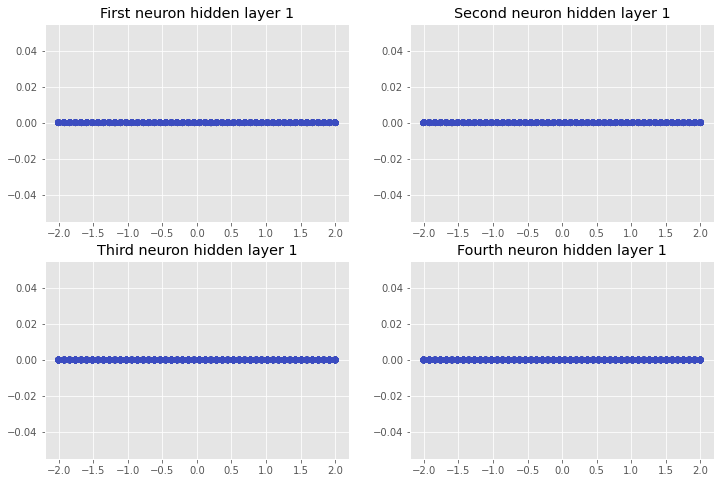

In [167]:
plt.figure(figsize =(12,8))

# First neuron, input layer
plt.subplot(221)
plt.title('First neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out11.reshape(-1), cmap=cm.coolwarm)

# Second neuron, input layer
plt.subplot(222)
plt.title('Second neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out12.reshape(-1), cmap=cm.coolwarm)

# Third neuron, input layer
plt.subplot(223)
plt.title('Third neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out13.reshape(-1), cmap=cm.coolwarm)

# Fourth neuron, input layer
plt.subplot(224)
plt.title('Fourth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out14.reshape(-1), cmap=cm.coolwarm)

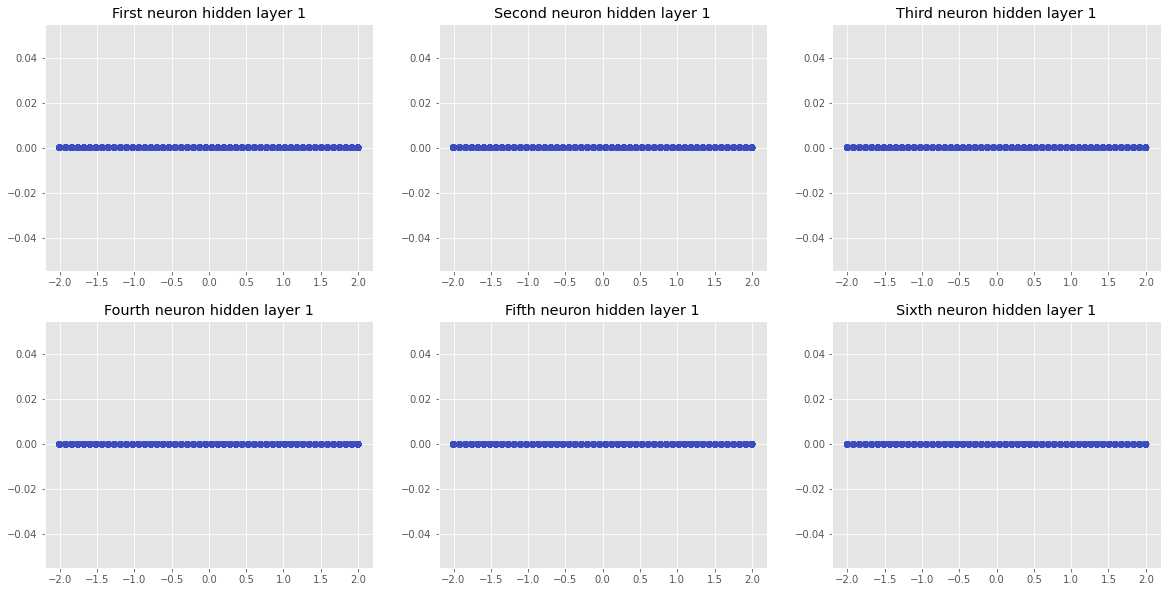

In [135]:
# First neuron, hidden layer
plt.figure(figsize = (20,10))
plt.subplot(231) 
plt.title('First neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out21.reshape(-1), cmap=cm.coolwarm)

# Second neuron, hidden layer
plt.subplot(232)
plt.title('Second neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out22.reshape(-1), cmap=cm.coolwarm)

# Third neuron, hidden layer
plt.subplot(233)
plt.title('Third neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out23.reshape(-1), cmap=cm.coolwarm)

# Fourth neuron, hidden layer
plt.subplot(234)
plt.title('Fourth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out24.reshape(-1), cmap=cm.coolwarm)

# Fifth neuron, hidden layer
plt.subplot(235)
plt.title('Fifth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out25.reshape(-1), cmap=cm.coolwarm)

# Sixth neuron, hidden layer
plt.subplot(236)
plt.title('Sixth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out26.reshape(-1), cmap=cm.coolwarm)

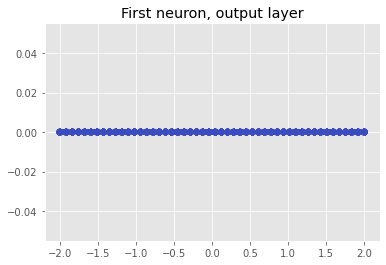

In [136]:
# first neuron, output layer
plt.title('First neuron, output layer')
plt.scatter(result[:, 0], result[:, 1], c= out31.reshape(-1), cmap=cm.coolwarm)

Text(0.5, 0.92, '3D visualization of our neural network first layer fourth neuron')

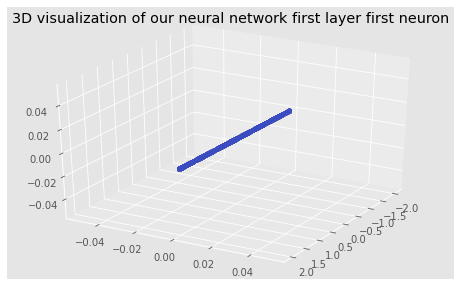

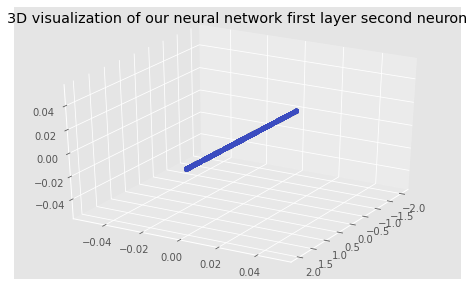

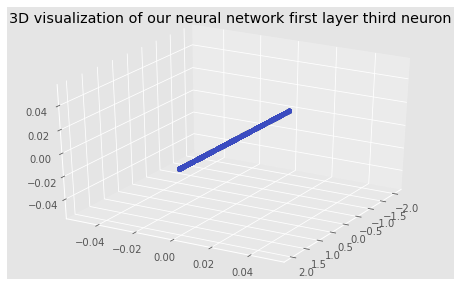

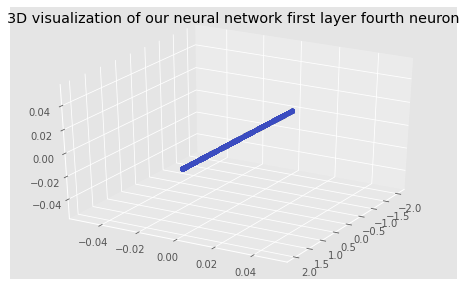

In [108]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out11.reshape(-1), c=out11.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer first neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out12.reshape(-1), c=out12.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer second neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out13.reshape(-1), c=out13.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer third neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out14.reshape(-1), c=out14.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer fourth neuron')